In [1]:
# 합성곱 신경망

# 입력층 > 합성곱층 > 풀링층 > 2-3 반복 > 완전연결층 > 출력층

In [2]:
# 입력층

# 이미지 데이터가 최초로 거치게 되는 계층
# 이때 이미지는 높이, 너비, 채널의 값을 갖는 3차원 데이터
# 이때의 채널은 그레이 스케일이면 1, 컬러면 R, G, B 3의 값을 갖는다.

In [3]:
# 합성곱층

# 입력 데이터에서 특성을 추출하는 역할
# 이미지에 대한 특성을 감지하기 위해 커널이나 필터를 사용
# 커널/필터는 이미지의 모든 영역을 스트라이드라는 지정된 간격에 따라 순차적으로 이동 하면서 특성을 추출 > 특성맵
# 필터는 보통 3x3, 5x5의 크기로 적용된다.

# 그레이스케일 이미지의 경우 필터의 채널은 1개, 컬러의 경우 이미지와 똑같이 필터의 채널은 3개 
# 즉, 필터 1개당 채널이 3개.

In [4]:
# 풀링층

# 특성맵의 차원을 다운 샘플링 하여 연산량을 감소시키고 주요한 특성 벡터를 추출.

# 최대 풀링 : 대상 영역에서 최댓값을 추출
# 평균 풀링 :  대상 영역에서 평균을 반환

In [5]:
# 완전 연결층

# 합성곱층과 풀링층을 거치면서 작아진 특성 맵이 최종적으로 전달되는 층.
# 이때 이미지가 3차원에서 1차원 벡터로 평쳐지게 된다.

In [6]:
# 출력층

# 주로 소프트맥스 활성화 함수가 사용 됨.
# 입력받은 값을 0 ~ 1 사이의 값으로 출력
# 이때 가장 높은 확률 값을 갖는 레이블이 최종 값으로 선정

In [7]:
# 1D 합성곱

# 필터가 시간을 축으로 좌우로만 이동할 수 있는 합성곱
# 그래프 곡선을 완화할 때 많이 사용

In [8]:
# 2D 합성곱

# 필터가 방향 두개로 움직이는 합성곱

In [9]:
# 3D 합성곱

# 필터가 세가지 방향으로 움직이는 합성곱
# 필터가 k, k, d 이고 입력이 W, H, L 일때 d는 L보다 작은 값을 유지하는게 좋다.

In [10]:
# 3D 입력을 갖는 2D 합성곱

# 입력은 3D 형태이지만 출력을 형태가 3D가 아닌 2D 행렬을 취하는 합성곱
# 필터의 길이가 입력 채널의 길이와 같으면 이런 형태가 된다.

In [11]:
# 1 x 1 합성곱

# W, H, L 의 3D 형태로 입력이 되고 1, 1, L 의 필터가 적용되어 W, H 의 출력을 갖는 합성곱
# 1, 1, L 의 필터로 채널 개수를 조정해서 연산량이 감소되는 효과가 있다.

In [12]:
import tensorflow as tf
import matplotlib.pyplot as pl
import numpy as np

fs_data = tf.keras.datasets.fashion_mnist                  # 샘플데이터 로드

In [13]:
(xtr, ytr), (xte, yte) = fs_data.load_data()
                                                           # 훈련데이터, 레이블 / 검정데이터, 레이블
print(xtr.shape, ytr.shape, xte.shape, yte.shape, sep = "\n\n")
                                                           # 요소 개수, 1개당 28열 28행

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)


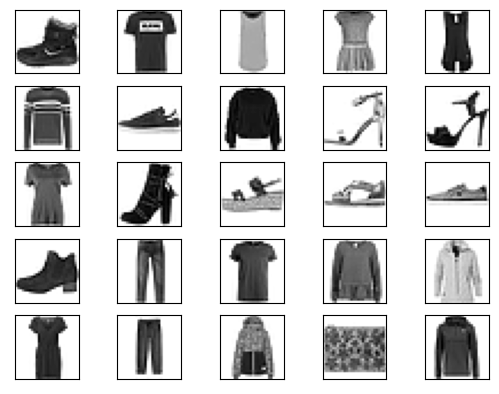

In [14]:
cn = [ 'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
                                                    # 분류에 사용될 클래스 정의
for i in range(25):                                 # 데이터 이미지 미리보기
    
    pl.subplot(5, 5, i+1)
    pl.grid(False)
    pl.xticks([])
    pl.yticks([])
    pl.imshow(xtr[i], cmap = pl.cm.binary)
    
pl.show()

In [15]:
xtr, xte = xtr/255.0 , xte/255.0                         # 0 ~ 255 인 이미지 값의 범위를 0 ~ 1 사이로 만들기 위해 나눈다.

In [16]:
md = tf.keras.models.Sequential([
    
    tf.keras.layers.Flatten(input_shape = (28, 28)),     # 완전연결층에 전달을 위해 데이터를 1차원으로 변환
    tf.keras.layers.Dense(128, activation = "relu"),     # 감소된 차원의 입력을 출력층과 연결하기 위해 밀집층 사용
    tf.keras.layers.Dropout(0.2),                        # 과적합을 방지하기 위해 20%의 노드를 0으로 만듦.
    tf.keras.layers.Dense(10, activation = "softmax")    # 출력층 ( 갖는 노드 갯수, 활성화 함수 )
    
])

md.compile( optimizer = 'adam',                          # 기울기를 구하고 파라미터를 학습에 어떻게 반영할지 결정하는 방법
            loss = 'sparse_categorical_crossentropy',    # 손실함수 설정. 손실함수를 사용하여 구한 값으로 기울기를 구한다.
            metrics = ['accuracy'] )                     # 모델 평가기준을 정확도로 설정

history = md.fit(xtr, ytr, epochs = 10, validation_split = 0.2)
                                                         # 모델 훈련
                                                         # batch_size = batch 크기 / validation_split = 20% 바로검증
md.evaluate(xte, yte, verbose = 2)                       # 모델 평가

Epoch 1/10
1500/1500 [==============================] - 1s 914us/step - loss: 0.5496 - accuracy: 0.8043 - val_loss: 0.4148 - val_accuracy: 0.8476
Epoch 2/10
1500/1500 [==============================] - 1s 708us/step - loss: 0.4121 - accuracy: 0.8512 - val_loss: 0.3856 - val_accuracy: 0.8563
Epoch 3/10
1500/1500 [==============================] - 1s 709us/step - loss: 0.3760 - accuracy: 0.8616 - val_loss: 0.3678 - val_accuracy: 0.8658
Epoch 4/10
1500/1500 [==============================] - 1s 710us/step - loss: 0.3519 - accuracy: 0.8701 - val_loss: 0.3689 - val_accuracy: 0.8647
Epoch 5/10
1500/1500 [==============================] - 1s 723us/step - loss: 0.3353 - accuracy: 0.8764 - val_loss: 0.3504 - val_accuracy: 0.8729
Epoch 6/10
1500/1500 [==============================] - 1s 703us/step - loss: 0.3226 - accuracy: 0.8809 - val_loss: 0.3221 - val_accuracy: 0.8817
Epoch 7/10
1500/1500 [==============================] - 1s 720us/step - loss: 0.3111 - accuracy: 0.8854 - val_loss: 0.3251 -

[0.3446435332298279, 0.8773999810218811]

In [17]:
md.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


<function matplotlib.pyplot.show(close=None, block=None)>

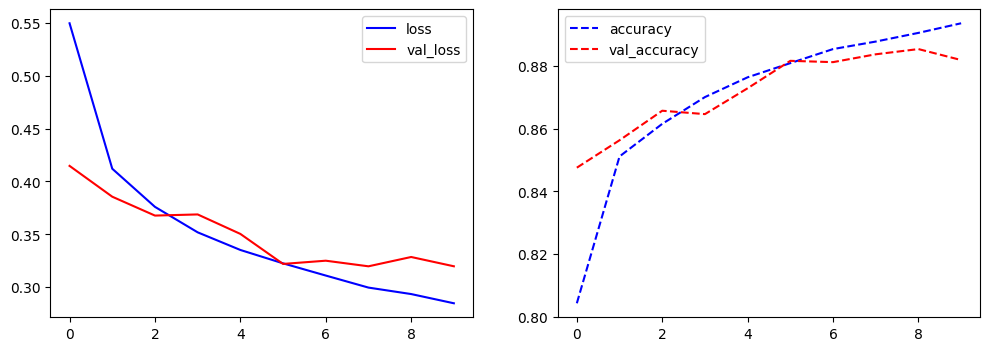

In [18]:
pl.figure(figsize = (12, 4))
pl.subplot(1, 2, 1)                           # loss 그래프 -> loss, val_loss

pl.plot(history.history['loss'], 'b-', label = 'loss')
pl.plot(history.history['val_loss'], 'r-', label = 'val_loss')
pl.legend()

pl.subplot(1, 2, 2)                           # accuracy 그래프 -> accuracy, val_accuracy

pl.plot(history.history['accuracy'], 'b--', label = 'accuracy')
pl.plot(history.history['val_accuracy'], 'r--', label = 'val_accuracy')
pl.legend()

pl.show

In [19]:
pre = md.predict(xte)                          # 예측 데이터 추출
print(np.argmax(pre[4860]), yte[4860])         # 개별적으로 비교 가능

7 7


In [20]:
# 합성곱 네트워크를 이용한 모델 생성

In [21]:
import tensorflow as tf
import matplotlib.pyplot as pl
import numpy as np

fs_data = tf.keras.datasets.fashion_mnist                  # 샘플데이터 로드

In [22]:
(xtr, ytr), (xte, yte) = fs_data.load_data()
                                                           # 훈련데이터, 레이블 / 검정데이터, 레이블
xtrr = xtr.reshape((-1, 28, 28, 1)) / 255                  # 합성곱 네트워크를 적용하기 위해 채널 추가
xter = xte.reshape((-1, 28, 28, 1)) / 255

In [30]:
md = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = "relu", input_shape = (28, 28, 1)),
              # 생성될 필터 수, 필터의 크기, padding 유무, 활성함수, 입력의 모양
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
                            # 필터의 크기, 스트라이드
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation = "relu"),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Flatten(),                            # 완전연결층에 전달을 위해 데이터를 1차원으로 변환
    tf.keras.layers.Dense(256, activation = "relu"),      # 완전연결층
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = "softmax")     # 출력층
    
])

md.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
md.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

In [31]:
hst = md.fit(xtrr, ytr, epochs = 5, validation_split = 0.2)
md.evaluate(xter, yte, verbose = 2)

Epoch 1/5
1500/1500 [==============================] - 59s 39ms/step - loss: 0.4241 - accuracy: 0.8459 - val_loss: 0.2972 - val_accuracy: 0.8885
Epoch 2/5
1500/1500 [==============================] - 59s 40ms/step - loss: 0.2668 - accuracy: 0.9035 - val_loss: 0.2407 - val_accuracy: 0.9112
Epoch 3/5
1500/1500 [==============================] - 60s 40ms/step - loss: 0.2141 - accuracy: 0.9215 - val_loss: 0.2386 - val_accuracy: 0.9127
Epoch 4/5
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1785 - accuracy: 0.9338 - val_loss: 0.2404 - val_accuracy: 0.9141
Epoch 5/5
1500/1500 [==============================] - 62s 41ms/step - loss: 0.1505 - accuracy: 0.9449 - val_loss: 0.2230 - val_accuracy: 0.9253
313/313 - 2s - loss: 0.2479 - accuracy: 0.9181


[0.2478603571653366, 0.9180999994277954]

<function matplotlib.pyplot.show(close=None, block=None)>

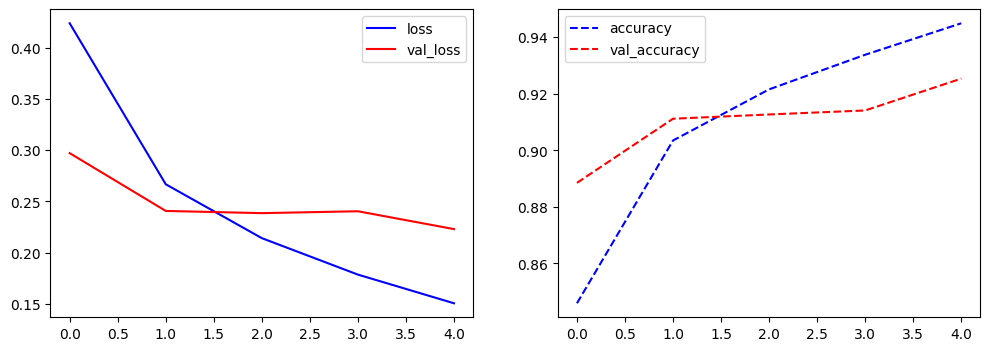

In [33]:
pl.figure(figsize = (12, 4))
pl.subplot(1, 2, 1)                           # loss 그래프 -> loss, val_loss

pl.plot(hst.history['loss'], 'b-', label = 'loss')
pl.plot(hst.history['val_loss'], 'r-', label = 'val_loss')
pl.legend()

pl.subplot(1, 2, 2)                           # accuracy 그래프 -> accuracy, val_accuracy

pl.plot(hst.history['accuracy'], 'b--', label = 'accuracy')
pl.plot(hst.history['val_accuracy'], 'r--', label = 'val_accuracy')
pl.legend()

pl.show